In [32]:
import pandas as pd

In [33]:
df = pd.read_csv(r"C:\Users\Pallavi\Desktop\Machine Leraning\archive\AB_NYC_2019.csv")

In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
df.shape

(48895, 16)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [37]:
for cols in df.columns:   # chi square to check relation of categorical columns
    if df[cols].dtype=='object':
        from scipy.stats import chi2_contingency
        chi_df=pd.crosstab(df[cols],df['price'])
        a,p_value,b,c=chi2_contingency(chi_df)
        if p_value < 0.05:
            print(f'{cols} has p_value of {p_value}')

name has p_value of 1.410673310046897e-225
neighbourhood_group has p_value of 0.0
neighbourhood has p_value of 8.076998282637908e-183
room_type has p_value of 0.0


In [38]:
df.corr()

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_8900\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [39]:
df = df.drop(['id','name','host_name'],axis = 1)

In [40]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [41]:
df = df.drop(['last_review','reviews_per_month','host_id'],axis = 1)

In [42]:
df1 = df.drop(['price'],axis = 1)

In [43]:
for cols in df1.columns: # removing outliers from dataset df1
    if df1[cols].dtype!='object':
        q1=df1[cols].quantile(0.25)
        q3=df1[cols].quantile(0.75)
        q2=q3-q1
        low=q1-(1.5*q2)
        high=q3+(1.5*q2)
        (df1.loc[(df1[cols]<low) | (df1[cols]>high),cols])=df1[cols].median()

In [44]:
df1

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,1,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,5,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1,0,1,2


In [45]:
df2 = pd.concat([df1,df.price],axis = 1)   #add price column to df2 

In [46]:
df2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,1,365,149
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,225
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,1,365,150
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,5,1,194,89
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,80
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,2,9,70
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,4,0,2,36,40
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,10,0,1,27,115
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1,0,1,2,55


<Axes: >

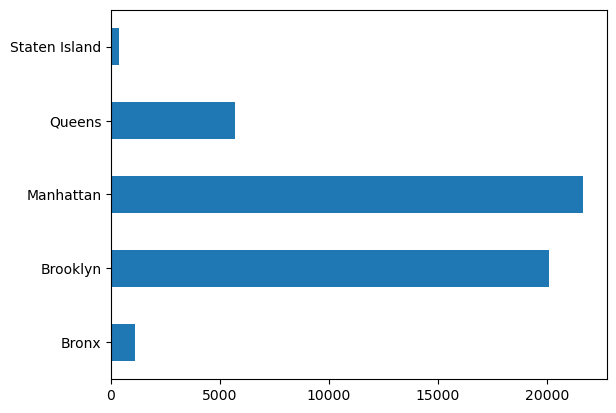

In [47]:
# Which neighborhood_group has the most AirBnB?
df2['neighbourhood_group'].value_counts().sort_index().plot.barh()

##### Get correlation between different values

In [48]:
############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_8900\3314128795.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr(method='kendall')


Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'price'],
      dtype='object')

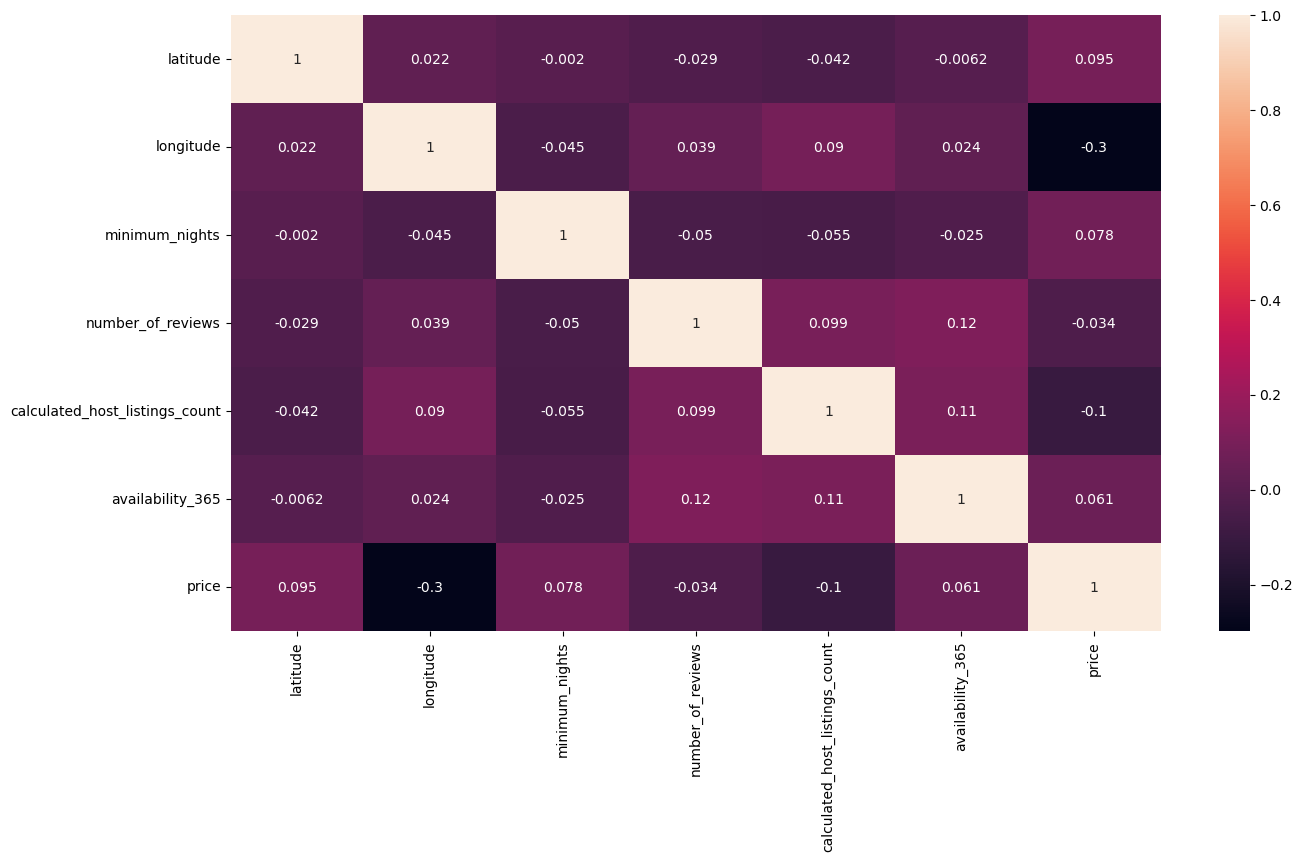

In [49]:
corr = df2.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df2.columns

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # categorical to numerical conversion

In [51]:
df2[df2.select_dtypes(include = ['object']).columns] = df2[df2.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [52]:
df2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,1,108,40.64749,-73.97237,1,1,9,1,365,149
1,2,127,40.75362,-73.98377,0,1,45,2,355,225
2,2,94,40.80902,-73.94190,1,3,0,1,365,150
3,1,41,40.68514,-73.95976,0,1,5,1,194,89
4,2,61,40.79851,-73.94399,0,10,9,1,0,80
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,2,9,70
48891,1,28,40.70184,-73.93317,1,4,0,2,36,40
48892,2,94,40.81475,-73.94867,0,10,0,1,27,115
48893,2,95,40.75751,-73.99112,2,1,0,1,2,55


In [53]:
X = df2.drop('price',axis=1)
y= df2['price']

In [20]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [22]:
print("Train size",X_train.size)
print("Train shape",X_train.shape)
print("Test size",X_test.size)
print("Test shape",X_test.shape)

Train size 352044
Train shape (39116, 9)
Test size 88011
Test shape (9779, 9)


In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)
Reg_predict_1=reg.predict(X_test)

<IPython.core.display.Javascript object>

In [24]:
reg.score(X_train,y_train)

0.09026761780399184

In [25]:
reg.score(X_test,y_test)

0.11804487522289198

In [29]:
# Data is under fitting

In [30]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [31]:
lasso_reg.score(X_train,y_train)

0.09014491984513573

In [32]:
lasso_reg.score(X_test,y_test)

0.11825558582811446

In [36]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1, max_iter=100, tol=0.1)

In [37]:
ridge_reg.score(X_train,y_train)

0.09026761775556358

In [38]:
ridge_reg.score(X_test,y_test)

0.11804499400825663

### Logistic Regression

In [40]:
df2.price.median()

106.0

In [41]:
def categorize_price(value):   # cnverting into binary classs cheap and expensive
    if value > 106:
        return 'expensive'
    else:
        return 'cheap'

In [42]:
df2['category'] = df2['price'].apply(categorize_price)

In [44]:
df2 = df2.drop(['price'],axis = 1)

In [45]:
df2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,category
0,1,108,40.64749,-73.97237,1,1,9,1,365,expensive
1,2,127,40.75362,-73.98377,0,1,45,2,355,expensive
2,2,94,40.80902,-73.94190,1,3,0,1,365,expensive
3,1,41,40.68514,-73.95976,0,1,5,1,194,cheap
4,2,61,40.79851,-73.94399,0,10,9,1,0,cheap
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,2,9,cheap
48891,1,28,40.70184,-73.93317,1,4,0,2,36,cheap
48892,2,94,40.81475,-73.94867,0,10,0,1,27,expensive
48893,2,95,40.75751,-73.99112,2,1,0,1,2,cheap


In [47]:
from sklearn.model_selection import train_test_split
stratified_x = df2.drop(['category'] , axis = 1)
stratified_y = df2['category']
train_X , test_X , train_y , test_y = train_test_split(stratified_x ,stratified_y , test_size=0.20 , stratify=stratified_y,random_state = 0)

In [49]:
train_X.shape

(39116, 9)

In [50]:
train_y.shape

(39116,)

In [51]:
test_X.shape

(9779, 9)

In [52]:
test_y.shape

(9779,)

In [53]:
train_y = np.ravel(train_y, order='C')

<IPython.core.display.Javascript object>

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X , train_y)

LogisticRegression()

In [55]:
pred_y = lr.predict(test_X)

In [56]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

array([[3925,  969],
       [ 837, 4048]], dtype=int64)

In [58]:
w = accuracy_score(test_y , pred_y)

In [59]:
w

0.8153185397279885